# CLASE 11

### Análisis de Correlación
La correlación se refiere a una medida estadística que describe la relación entre dos o más variables. Cuando decimos que dos variables están correlacionadas, esto significa que un cambio en una variable tiende a estar
acompañado por un cambio en la otra variable.

Por ejemplo, el aumento en la cantidad de horas estudiadas está generalmente relacionado con un aumento en el rendimiento académico.

Analizar la correlación entre variables nos permite identificar patrones y tendencias en nuestros datos.

## Cálculo de la Correlación con Pandas

Para calcular la correlación entre nuestras variables, utilizamos el método
`DataFrame.corr()` en Pandas. Este método devuelve una **matriz de correlación**.

```Python
correlation_matrix = mi_dataframe.corr()
print(correlation_matrix)
```

Es importante interpretar correctamente esta matriz:

* Valores cercanos a +1 indican una fuerte correlación positiva,

* Valores cerca de -1 indican una fuerte correlación negativa.

* Los valores cercanos a 0 indican que no existe correlación entre las variables.




## Visualización de Correlaciones con Seaborn

Seaborn ofrece herramientas prácticas para crear gráficos como el mapa de calor, ideal para representar la matriz de correlación:

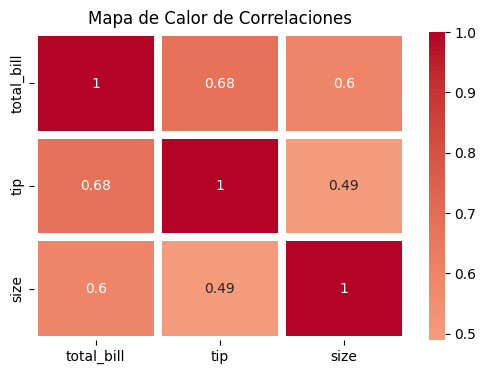

In [3]:
# Importamos las librerías/Módulos
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos tips de Seaborn
tips = sns.load_dataset("tips")

# Calcular la matriz de correlación
correlation_matrix = tips.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            linewidths=5.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

**Recordemos:**

* **total_bill:** Monto total de la cuenta.

* **tip:** Monto de la propina.

* **size:** Número de personas en la mesa.


###  ¿Qué muestra el mapa de calor?

El **heatmap** visualiza la **matriz de correlación**, es decir, cómo se relacionan linealmente las variables entre sí.
Los valores van de **-1 a 1**:

* **1: correlación perfecta positiva** (ambas variables aumentan juntas)
* **0: sin correlación lineal**
* **-1: correlación perfecta negativa** (una sube cuando la otra baja)

Los colores ayudan a interpretar rápidamente:

* **Rojo oscuro: correlación positiva fuerte**
* **Azul (si existiera): correlación negativa**
* **Tonos intermedios: correlaciones moderadas o débiles**

---
#### En este gráfico:


* Las tres variables están **positivamente relacionadas**.
* El vínculo más fuerte es entre **propina y total de la cuenta**.
* No hay correlaciones negativas ni valores atípicos extremos que distorsionen el análisis.

En términos prácticos, el gráfico te permite visualizar **qué variables tienen relaciones significativas** y cuáles no, algo muy útil antes de aplicar modelos predictivos o análisis más profundos.

---
Veamos como personalizar un poquito este tipo de gráficos:



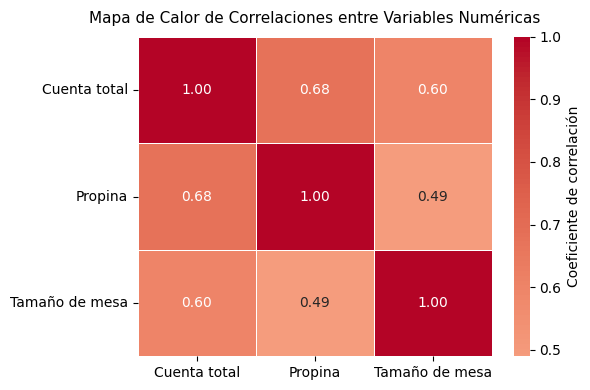

In [5]:
# Renombrar las columnas y filas a español
correlation_matrix = correlation_matrix.rename(
    index={
        'total_bill': 'Cuenta total',
        'tip': 'Propina',
        'size': 'Tamaño de mesa'
    },
    columns={
        'total_bill': 'Cuenta total',
        'tip': 'Propina',
        'size': 'Tamaño de mesa'
    }
)

# Crear el mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    fmt=".2f",
    cbar_kws={'label': 'Coeficiente de correlación'}
)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas', fontsize=11, pad=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### ¿Qué hace cada linea?

----

```python
plt.figure(figsize=(6, 4))
```

Crea una nueva figura de Matplotlib con tamaño **6 pulgadas de ancho x 4 de alto**. Sirve para controlar el espacio visual del gráfico.

---

```python
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    fmt=".2f",
    cbar_kws={'label': 'Coeficiente de correlación'}
)
```



| Argumento                                              | Significado                                                                                                      |
| ------------------------------------------------------ | ---------------------------------------------------------------------------------------------------------------- |
| **`correlation_matrix`**                               | Es el DataFrame que contiene los valores de correlación (entre -1 y 1).                                          |
| **`annot=True`**                                       | Muestra los valores numéricos dentro de cada celda del mapa de calor.                                            |
| **`cmap='coolwarm'`**                                  | Define la paleta de colores. En este caso, de azul (negativo) a rojo (positivo).                                 |
| **`center=0`**                                         | Indica que el valor 0 debe estar en el centro de la escala de colores. Útil para distinguir positivos/negativos. |
| **`linewidths=0.5`**                                   | Añade líneas finas entre las celdas para que se distingan mejor.                                                 |
| **`fmt=".2f"`**                                        | Indica el formato de los números dentro de las celdas (dos decimales).                                           |
| **`cbar_kws={'label': 'Coeficiente de correlación'}`** | Personaliza la barra de color (colorbar) y le agrega una etiqueta explicativa.                                   |

---

```python
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas', fontsize=11, pad=10)
```

Agrega un **título** al gráfico.

* `fontsize=11` → tamaño del texto.
* `pad=10` → separación entre el título y el gráfico.

---

```python
plt.xticks(rotation=25)
plt.yticks(rotation=0)
```

Ajusta la **rotación de las etiquetas** de los ejes:

* `rotation=25` → gira las etiquetas del eje X 25° para que no se superpongan.
* `rotation=0` → mantiene las etiquetas del eje Y horizontales.

---

```python
plt.tight_layout()
```

Ajusta automáticamente los márgenes y el espaciado para que **nada quede recortado** al mostrar la figura.

---

```python
plt.show()
```

Muestra el gráfico en pantalla.
(Sin esta línea, el gráfico puede no aparecer en algunos entornos, como scripts o notebooks).

## Ejemplo con otro dataset

Utilizamos un archivo que contenga información sobre las dimensiones de pétalos y sépalos de algunas especies de flores.



In [6]:
# Cargar el set de datos
df = sns.load_dataset("iris")

display(df.head())
display(df.tail())



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
# Exploramos la columna de especies
display(df['species'].unique())



array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# Elegimos solo una:

setosa = df[df['species'] == 'setosa'].drop(['species'], axis='columns')
display(setosa.head())


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Calculamos la matriz de correlación, y la mostramos:

In [9]:
# Crear la matriz de correlación
correlation_matrix = setosa.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.742547      0.267176     0.278098
sepal_width       0.742547     1.000000      0.177700     0.232752
petal_length      0.267176     0.177700      1.000000     0.331630
petal_width       0.278098     0.232752      0.331630     1.000000


La mejor opción para explorar visualmente el mapa de correlaciones es el mapa de
calor:

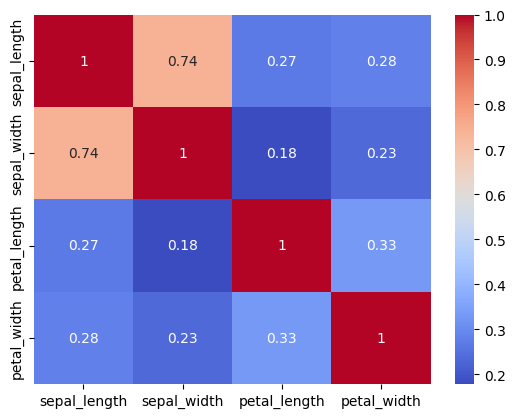

In [10]:
# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Y lo personalizamos como en la clase anterior:


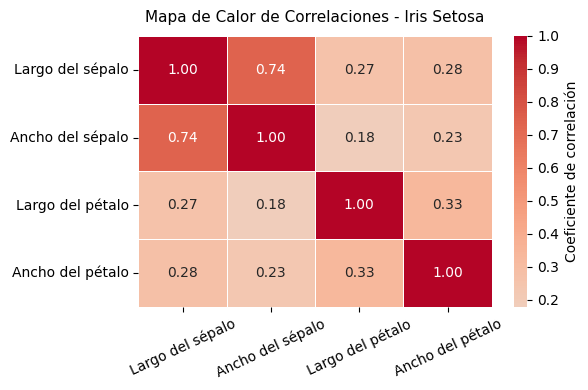

In [11]:
# ------------------------------------------------------------
# MAPA DE CALOR DE CORRELACIONES - ESPECIE SETOSA (IRIS)
# ------------------------------------------------------------


# Renombramos las filas y columnas para que aparezcan en español
correlation_matrix = correlation_matrix.rename(
    index={
        'sepal_length': 'Largo del sépalo',
        'sepal_width': 'Ancho del sépalo',
        'petal_length': 'Largo del pétalo',
        'petal_width': 'Ancho del pétalo'
    },
    columns={
        'sepal_length': 'Largo del sépalo',
        'sepal_width': 'Ancho del sépalo',
        'petal_length': 'Largo del pétalo',
        'petal_width': 'Ancho del pétalo'
    }
)

# ------------------------------------------------------------
# Crear el mapa de calor
# ------------------------------------------------------------
plt.figure(figsize=(6, 4))  # Tamaño del gráfico (ancho x alto)

sns.heatmap(
    correlation_matrix,      # Matriz de correlación a graficar
    annot=True,              # Muestra los valores dentro de las celdas
    cmap='coolwarm',         # Paleta de colores: azul (negativo) a rojo (positivo)
    center=0,                # El valor 0 queda al centro de la escala de color
    linewidths=0.5,          # Líneas divisorias entre celdas
    fmt=".2f",               # Formato numérico: 2 decimales
    cbar_kws={'label': 'Coeficiente de correlación'}  # Etiqueta de la barra de color
)

# ------------------------------------------------------------
# Personalización del gráfico
# ------------------------------------------------------------
plt.title('Mapa de Calor de Correlaciones - Iris Setosa', fontsize=11, pad=10)
plt.xticks(rotation=25)  # Rotar etiquetas del eje X
plt.yticks(rotation=0)   # Mantener etiquetas del eje Y horizontales
plt.tight_layout()       # Ajustar márgenes para evitar solapamientos

# Mostrar el gráfico
plt.show()
